In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources\\mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources\\clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

mouse_df = pd.DataFrame(mouse_data)
drug_df = pd.DataFrame(drug_data)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, drug_df, how='outer', on='Mouse ID')


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_mean_tumor_vol = merge_df[["Drug", "Timepoint","Tumor Volume (mm3)"]]
drug_mean_tumor_vol_grouped = drug_mean_tumor_vol.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
tumor_by_vol = pd.DataFrame(drug_mean_tumor_vol_grouped["Tumor Volume (mm3)"].agg(np.mean))

# Preview DataFrame
tumor_by_vol_indexed = tumor_by_vol.reset_index()
tumor_by_vol_indexed.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_by_vol = merge_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
tumor_by_vol_pd = pd.DataFrame(tumor_by_vol[['Tumor Volume (mm3)']])

# Preview DataFrame
tumor_by_vol_sem = tumor_by_vol_pd.reset_index()
tumor_by_vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Minor Data Munging to Re-Format the Data Frames
drug_vol = tumor_by_vol_indexed.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
drug_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


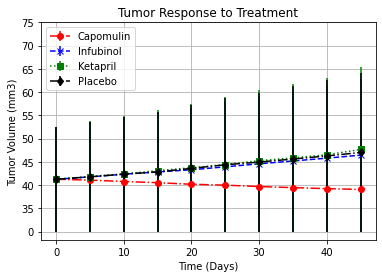

In [14]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, len(drug_vol), 1)
cap_vol = plt.errorbar(x_axis, drug_vol['Capomulin'], yerr=drug_vol['Capomulin'], linestyle = '-.',marker='o', color='red', label='Capomulin')
inf_vol = plt.errorbar(x_axis, drug_vol['Infubinol'], yerr=drug_vol['Infubinol'], linestyle = '--',marker='x', color='blue', label='Infubinol')
ket_vol = plt.errorbar(x_axis, drug_vol['Ketapril'], yerr=drug_vol['Ketapril'], linestyle = ':', marker='s', color='green', label='Ketapril')
pla_vol = plt.errorbar(x_axis, drug_vol['Placebo'], yerr=drug_vol['Placebo'], linestyle = '-.', marker='d', color='black', label='Placebo')
plt.legend(handles=[cap_vol, inf_vol, ket_vol, pla_vol], loc='upper left')
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid()
plt.yticks(np.arange(0,200,20),('0', '35', '40', '45', '50','55','60','65','70', '75'))
plt.xticks(np.arange(0,10,2),('0', '10', '20', '30', '40'))

# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

In [15]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_mean_meta_sites = merge_df[['Drug', 'Timepoint', 'Metastatic Sites']]
drug_mean_meta_sites_grouped = drug_mean_meta_sites.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
metastatic_sites_mean_df = pd.DataFrame(drug_mean_meta_sites_grouped['Metastatic Sites'].agg(np.mean))

# Preview DataFrame
metastatic_sites_mean_indexed = metastatic_sites_mean_df.reset_index()
metastatic_sites_mean_indexed.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_se = merge_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame\
metastatic_sites_se_df = pd.DataFrame(metastatic_sites_se['Metastatic Sites'])

# Preview DataFrame
metastatic_sites_se_indexed = metastatic_sites_se_df.reset_index()
metastatic_sites_se_indexed.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [25]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_vol = metastatic_sites_mean_indexed.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_sem_pivot = metastatic_sites_se_indexed.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


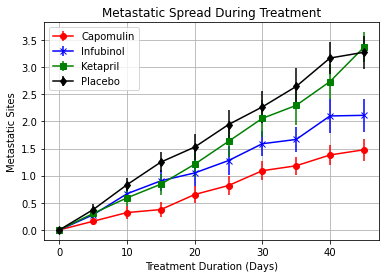

In [26]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, len(metastatic_vol), 1)
cap_met = plt.errorbar(x_axis, metastatic_vol["Capomulin"], yerr=metastatic_sem_pivot["Capomulin"], linestyle = "-",marker="o", color="red", label="Capomulin")
inf_met = plt.errorbar(x_axis, metastatic_vol["Infubinol"], yerr=metastatic_sem_pivot["Infubinol"], linestyle = "-",marker="x", color="blue", label="Infubinol")
ket_met = plt.errorbar(x_axis, metastatic_vol["Ketapril"], yerr=metastatic_sem_pivot["Ketapril"], linestyle = "-", marker="s", color="green", label="Ketapril")
pla_met = plt.errorbar(x_axis, metastatic_vol["Placebo"], yerr=metastatic_sem_pivot["Placebo"], linestyle = "-", marker="d", color="black", label="Placebo")
plt.legend(handles=[cap_met, inf_met, ket_met, pla_met], loc="best")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid()
plt.xticks(np.arange(0,10,2),("0", "10", "20", "30", "40"))

# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data = merge_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
survival_df = pd.DataFrame(survival_data["Mouse ID"].count())
survival_renamed = survival_df.rename(columns={"Mouse ID":"Mouse Count"})
survival_noindex = survival_renamed.reset_index()

# Preview DataFrame
survival_noindex.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates = survival_noindex.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
survival_rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


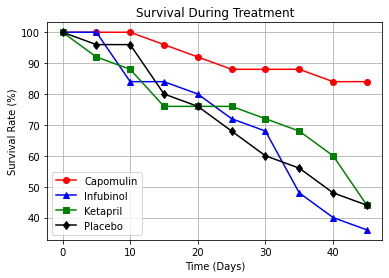

In [29]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, len(survival_rates), 1)
y_axis = [survival_rates["Capomulin"]*4, survival_rates["Infubinol"]*4, survival_rates["Ketapril"]*4, survival_rates["Placebo"]*4]
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
colors = ["red", "blue", "green", "black"]
linestyles = ["-", "-", "-", "-"]
markers = ["o", "^", "s", "d"]
for i in range(len(y_axis)):
    plt.plot(x_axis, y_axis[i], color=colors[i], linestyle = linestyles[i], marker=markers[i], label=labels[i])
plt.legend()
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid()
plt.xticks(np.arange(0,10,2),("0", "10", "20", "30", "40"))

# Save the Figure
plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [30]:
# Calculate the percent changes for each drug
drug = [list(drug_vol["Capomulin"]), list(drug_vol["Ceftamin"]), list(drug_vol["Infubinol"]), 
        list(drug_vol["Ketapril"]), list(drug_vol["Naftisol"]), list(drug_vol["Placebo"]), 
        list(drug_vol["Propriva"]), list(drug_vol["Ramicane"]), list(drug_vol["Stelasyn"]), 
        list(drug_vol["Zoniferol"])]
drugname=["Capomulin", "Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo",
          "Propriva","Ramicane", "Stelasyn", "Zoniferol"]
drug_change =[]
for x in range(len(drug)):
    percent_ = (drug[x][-1]-drug[x][0])/drug[x][0]*100
    drug_change.append(percent_)

# Display the data to confirm
df = {'Drug' : drugname, 'Percentage change' : drug_change }
pd.DataFrame(df)

,Drug,Percentage change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


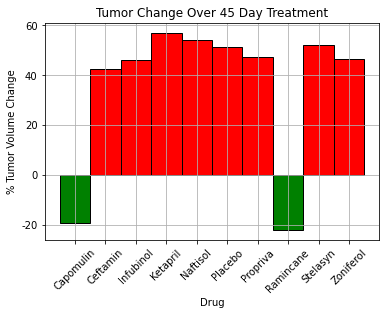

In [93]:
# Store all Relevant Percent Changes into a Tuple
tuple_percentage = tuple(zip(drugname, drug_change))

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
percent_df = pd.DataFrame({'Drug':drugname, 'Percent Change':drug_change})

colors = []
label = ('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
         'Ramincane', 'Stelasyn', 'Zoniferol')
for change in range(0, len(drug_change)):
    if drug_change[change] > 0:
        colors.append('red')
    else:
        colors.append('green')

percent_df['Colors'] = colors
y_axis = [percent_df['Percent Change'][0], percent_df['Percent Change'][1], percent_df['Percent Change'][2], 
          percent_df['Percent Change'][3], percent_df['Percent Change'][4], percent_df['Percent Change'][5], 
          percent_df['Percent Change'][6], percent_df['Percent Change'][7], percent_df['Percent Change'][8], 
          percent_df['Percent Change'][9]]
x_axis = np.arange(0,len(y_axis), 1)
color_axis = [percent_df['Colors'][0], percent_df['Colors'][1], percent_df['Colors'][2], percent_df['Colors'][3], 
              percent_df['Colors'][4], percent_df['Colors'][5], percent_df['Colors'][6], percent_df['Colors'][7], 
              percent_df['Colors'][8], percent_df['Colors'][9]]
labels = [percent_df['Percent Change'][0], percent_df['Percent Change'][1], percent_df['Percent Change'][2], 
          percent_df['Percent Change'][3], percent_df['Percent Change'][4], percent_df['Percent Change'][5], 
          percent_df['Percent Change'][6], percent_df['Percent Change'][7], percent_df['Percent Change'][8], 
          percent_df['Percent Change'][9]]

plt.bar(x_axis, y_axis, color = color_axis, width = 1, edgecolor = 'black')
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid()
plt.yticks(np.arange(-20,80,20),('-20', '0', '20', '40', '60'))
plt.xticks(np.arange(0, 10), label, rotation = 45)

plt.xlabel('Drug')

# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)